In [76]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

#importing support vector machine
from sklearn.svm import SVC

from scipy.stats import zscore

#importing KFold & cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingClassifier #Bagging
from sklearn.tree import DecisionTreeClassifier #DecisionTree
from sklearn.ensemble import AdaBoostClassifier #Boosting - Ada
from sklearn.ensemble import GradientBoostingClassifier #Boosting - Gradient
from sklearn.ensemble import RandomForestClassifier #RandomForest

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd

from imblearn.over_sampling import SMOTE

%matplotlib inline

In [30]:
def show_results(y_test, y_predict) :
    cm = metrics.confusion_matrix(y_test, y_predict, labels = [0, 1, 2, 3, 4, 5])
    df_cm = pd.DataFrame(cm, index = [i for i in ["0", "1", "2", "3", "4", "5"]],
                        columns = [i for i in ["Predct 0","Predict 1", "Predict 2", "Predict 3", "Predict 4", "Predict 5" ]])
    plt.figure(figsize = (17, 15))
    sns.heatmap(df_cm, annot = True, linewidth = 0.1, linecolor = 'r', fmt = "d")
    plt.show()
    print(metrics.classification_report(y_test, y_predict, labels = [0,1, 2, 3, 4, 5]))

In [31]:
df = pd.read_csv('final_funds.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 68 columns):
fund_id                                25000 non-null object
greatstone_rating                      20000 non-null float64
fund_ratio_net_annual_expense          25000 non-null float64
total_assets                           25000 non-null float64
return_ytd                             25000 non-null float64
years_up                               25000 non-null float64
ytd_return_fund                        25000 non-null float64
2014_return_fund                       25000 non-null float64
fund_return_3months                    25000 non-null float64
1_year_return_fund                     25000 non-null float64
2015_return_fund                       25000 non-null float64
2016_return_fund                       25000 non-null float64
2011_return_fund                       25000 non-null float64
2010_return_fund                       25000 non-null float64
fund_return_3years      

In [32]:
final_df = df.dropna()
final_df['greatstone_rating'] = final_df['greatstone_rating'].astype('int64')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 24997
Data columns (total 68 columns):
fund_id                                20000 non-null object
greatstone_rating                      20000 non-null int64
fund_ratio_net_annual_expense          20000 non-null float64
total_assets                           20000 non-null float64
return_ytd                             20000 non-null float64
years_up                               20000 non-null float64
ytd_return_fund                        20000 non-null float64
2014_return_fund                       20000 non-null float64
fund_return_3months                    20000 non-null float64
1_year_return_fund                     20000 non-null float64
2015_return_fund                       20000 non-null float64
2016_return_fund                       20000 non-null float64
2011_return_fund                       20000 non-null float64
2010_return_fund                       20000 non-null float64
fund_return_3years        

C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\home\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


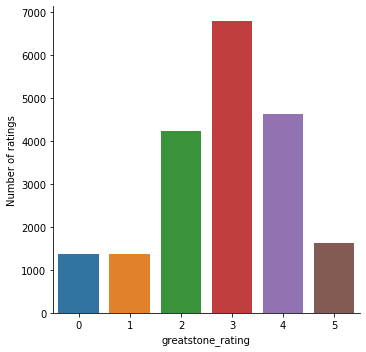

In [33]:
plot = sns.factorplot("greatstone_rating", data = final_df, kind = "count")
plot.set_ylabels("Number of ratings")

In [114]:
X = final_df.drop(['fund_id', 'greatstone_rating'], axis = 1)
y = final_df['greatstone_rating']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [71]:
rfc_model = RandomForestClassifier()
rfc_params = {'bootstrap': [True],
 'criterion' : ['entropy'],
 'min_samples_leaf' : [20,25,30,40,50, 60],
 'n_estimators': [800]}


rfc_grid = GridSearchCV(estimator = rfc_model, param_grid=rfc_params,
                               scoring='f1_macro', 
                              cv = 10, verbose=2, n_jobs=-1,
                              return_train_score=True)
rfc_grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 11.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [72]:
rfc_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'min_samples_leaf': 20,
 'n_estimators': 800}

In [73]:
rfc_model_final = RandomForestClassifier(n_estimators = 800, bootstrap = True, min_samples_leaf = 20, criterion = 'entropy')
rfc_model_final.fit(X_train, y_train)
y_predict_rfc = rfc_model_final.predict(X_test)

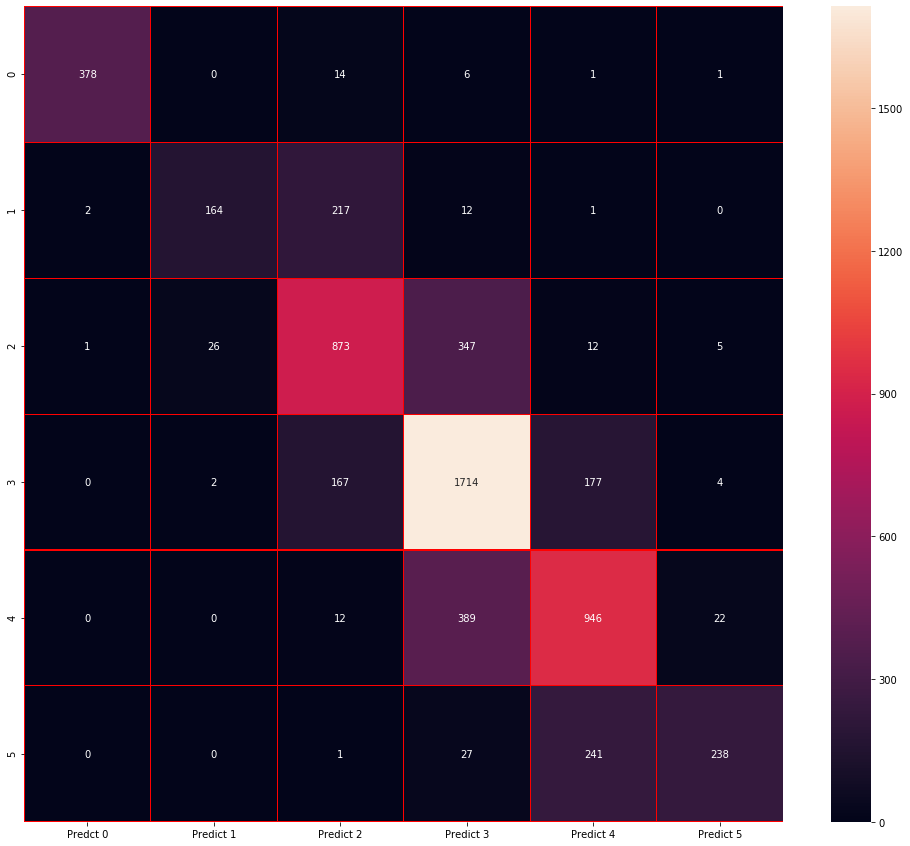

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       400
           1       0.85      0.41      0.56       396
           2       0.68      0.69      0.69      1264
           3       0.69      0.83      0.75      2064
           4       0.69      0.69      0.69      1369
           5       0.88      0.47      0.61       507

    accuracy                           0.72      6000
   macro avg       0.80      0.67      0.71      6000
weighted avg       0.73      0.72      0.71      6000



In [74]:
show_results(y_test, y_predict_rfc)

In [43]:
num_folds = 10
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
results = cross_val_score(rfc_model_final, X_train, y_train, cv = kfold, scoring='f1_macro')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.65782176 0.66980973 0.67631983 0.67998185 0.65495997 0.68928205
 0.68137634 0.66974856 0.66459697 0.70755151]
Accuracy: 67.514% (1.480%)


In [44]:
rfc_model_final.feature_importances_

array([0.01235893, 0.01895639, 0.00600538, 0.00352436, 0.00573062,
       0.00606641, 0.00632724, 0.00922527, 0.00880128, 0.01033492,
       0.0022035 , 0.00364217, 0.10081462, 0.00491787, 0.0073318 ,
       0.0084583 , 0.0050028 , 0.00322091, 0.00456494, 0.00982294,
       0.00360781, 0.0040209 , 0.00855652, 0.00411685, 0.00888419,
       0.00472452, 0.00848659, 0.0041842 , 0.00365625, 0.00313171,
       0.00188009, 0.00446853, 0.00833682, 0.01366428, 0.00966337,
       0.00724575, 0.00209009, 0.00735415, 0.02218946, 0.01676732,
       0.03052246, 0.00070104, 0.00554098, 0.0058075 , 0.01303659,
       0.04634775, 0.07341333, 0.06039959, 0.03605173, 0.01169512,
       0.00110527, 0.01608988, 0.0098204 , 0.00431764, 0.00343563,
       0.01567183, 0.0554143 , 0.05029944, 0.02919311, 0.03172679,
       0.06202511, 0.00687161, 0.00847959, 0.00270338, 0.01278506,
       0.02220482])

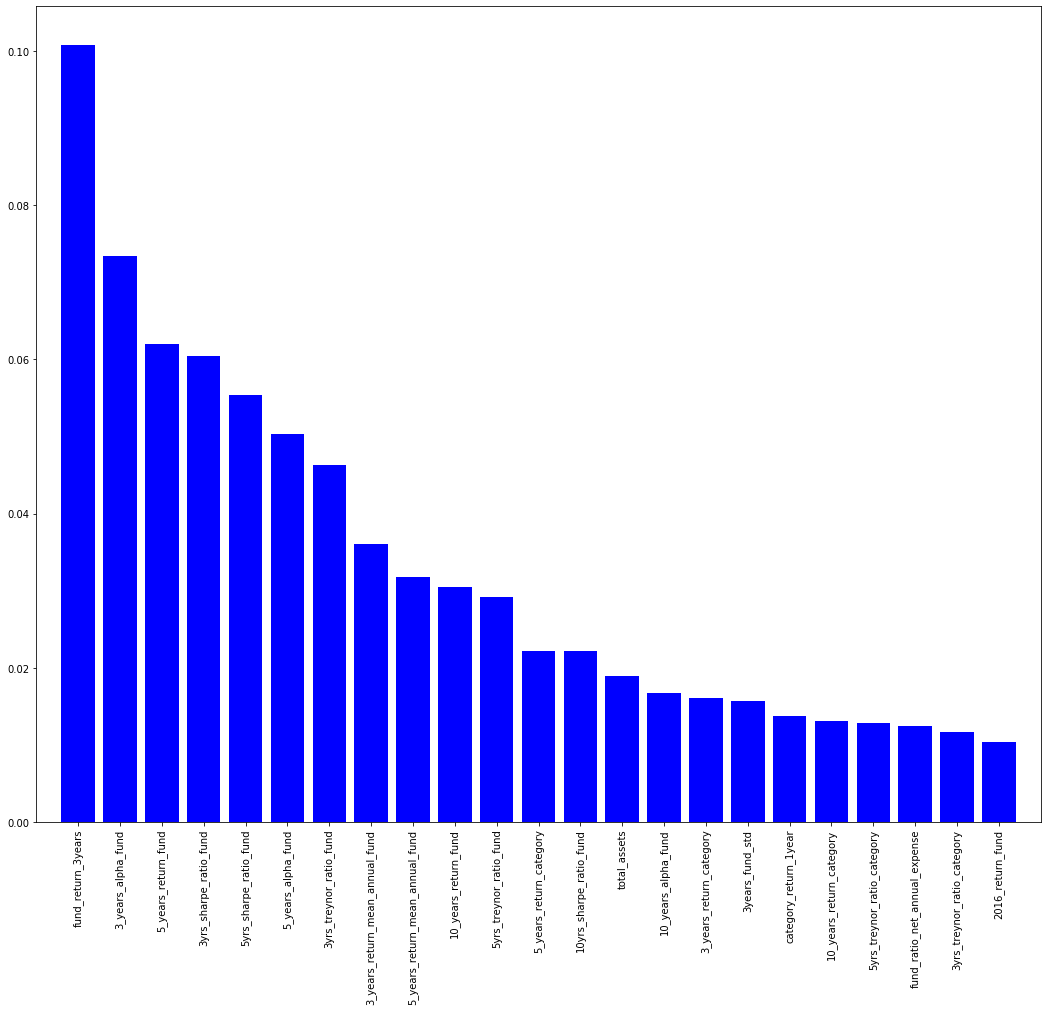

['fund_return_3years',
 '3_years_alpha_fund',
 '5_years_return_fund',
 '3yrs_sharpe_ratio_fund',
 '5yrs_sharpe_ratio_fund',
 '5_years_alpha_fund',
 '3yrs_treynor_ratio_fund',
 '3_years_return_mean_annual_fund',
 '5_years_return_mean_annual_fund',
 '10_years_return_fund',
 '5yrs_treynor_ratio_fund',
 '5_years_return_category',
 '10yrs_sharpe_ratio_fund',
 'total_assets',
 '10_years_alpha_fund',
 '3_years_return_category',
 '3years_fund_std',
 'category_return_1year',
 '10_years_return_category',
 '5yrs_treynor_ratio_category',
 'fund_ratio_net_annual_expense',
 '3yrs_treynor_ratio_category',
 '2016_return_fund']

In [65]:
features = X.columns
features_imp = rfc_model_final.feature_importances_
features_sorted_indices = np.argsort(features_imp)[::-1][:23]

#plot
plt.figure(figsize=(18,15))
plt.bar(range(len(features_sorted_indices)), features_imp[features_sorted_indices], color = 'b', align='center')
plt.xticks(range(len(features_sorted_indices)), features[features_sorted_indices], rotation='vertical')
plt.xlim([-1,len(features_sorted_indices)])
plt.show()
final_features = []
for i in features_sorted_indices:
    final_features.append(features[i])
final_features

In [77]:
X_final = X[final_features]
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_final, y)
print(X_resampled.shape)
print(y_resampled.shape)

(40716, 23)
(40716,)


In [154]:
X_final = X[final_features]
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.3, random_state = 1)

In [87]:
rfc_model = RandomForestClassifier()
rfc_params = {'bootstrap': [True],
 'criterion' : ['entropy'],
 'min_samples_leaf' : [20],
 'n_estimators': [600],
 'max_depth' : [5,8,15,20]
             }


rfc_grid = GridSearchCV(estimator = rfc_model, param_grid=rfc_params,
                               scoring='f1_macro', 
                              cv = 10, verbose=2, n_jobs=-1,
                              return_train_score=True)
rfc_grid.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 18.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [88]:
rfc_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 20,
 'n_estimators': 600}

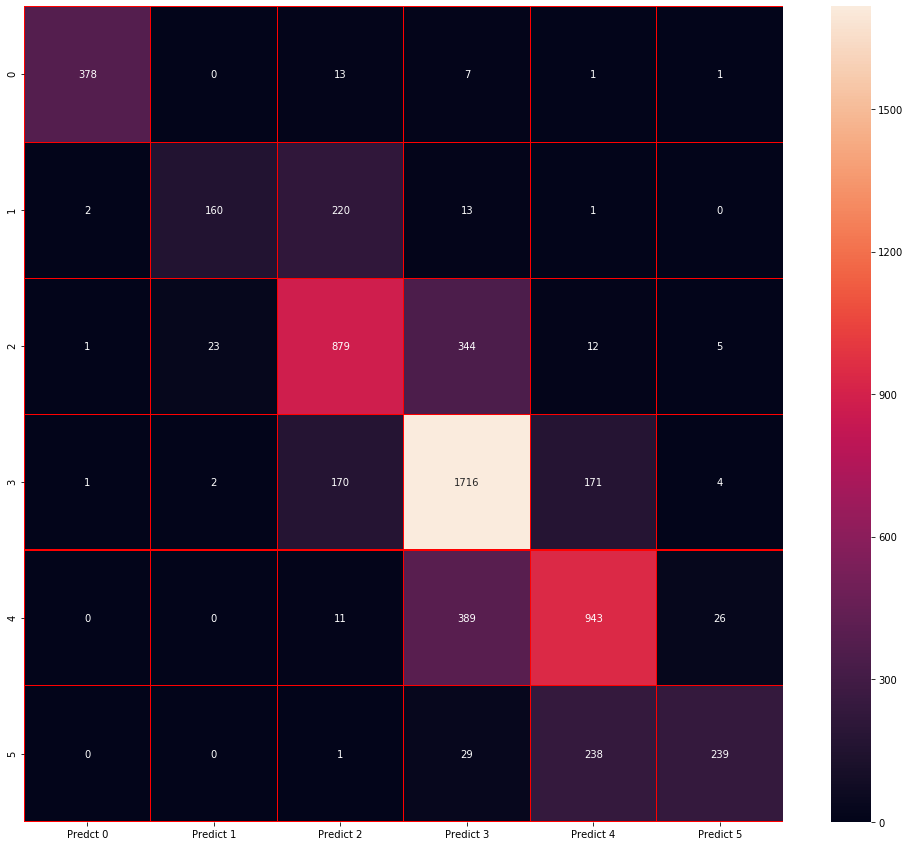

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       400
           1       0.86      0.40      0.55       396
           2       0.68      0.70      0.69      1264
           3       0.69      0.83      0.75      2064
           4       0.69      0.69      0.69      1369
           5       0.87      0.47      0.61       507

    accuracy                           0.72      6000
   macro avg       0.80      0.67      0.71      6000
weighted avg       0.73      0.72      0.71      6000



In [155]:
rfc_model_final = RandomForestClassifier(n_estimators = 600, bootstrap = True, min_samples_leaf = 20,
                                          criterion = 'entropy')
rfc_model_final.fit(X_train, y_train)
y_predict_rfc = rfc_model_final.predict(X_test)
show_results(y_test, y_predict_rfc)

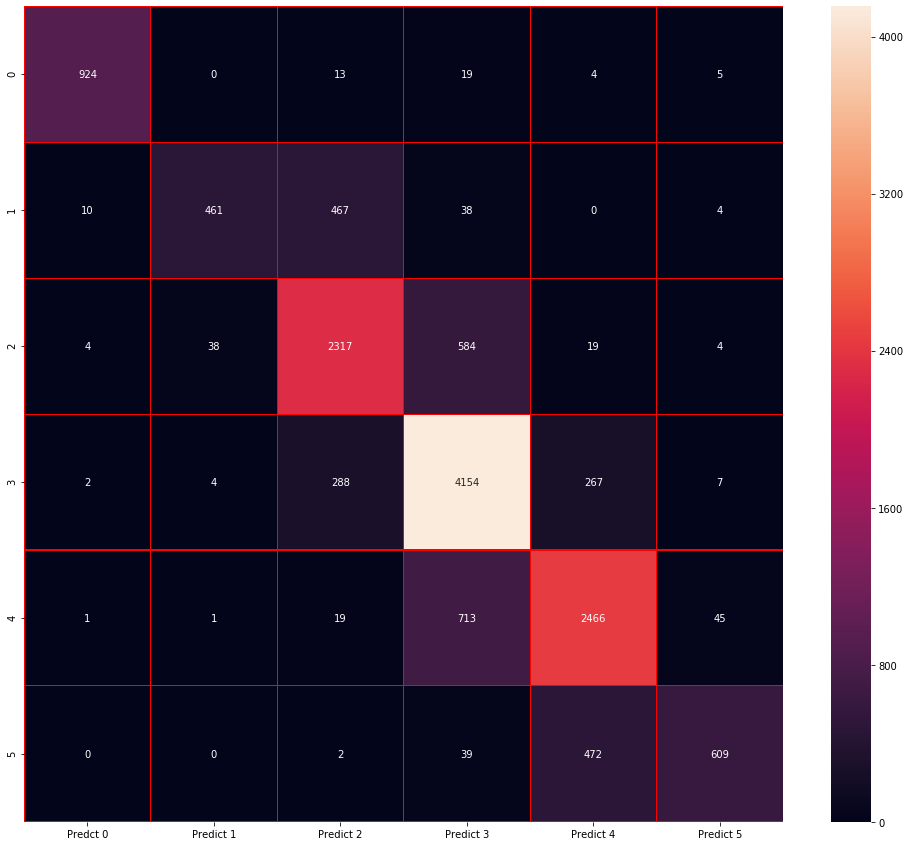

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       965
           1       0.91      0.47      0.62       980
           2       0.75      0.78      0.76      2966
           3       0.75      0.88      0.81      4722
           4       0.76      0.76      0.76      3245
           5       0.90      0.54      0.68      1122

    accuracy                           0.78     14000
   macro avg       0.84      0.73      0.77     14000
weighted avg       0.79      0.78      0.78     14000



In [156]:
y_predict_train = rfc_model_final.predict(X_train)
show_results(y_train, y_predict_train)

In [157]:
target_data = df[df.isnull().any(axis=1)]
target_data.shape

(5000, 68)

In [159]:
X_target_data = target_data.drop(['fund_id', 'greatstone_rating'], axis = 1)

In [160]:
target_data = target_data[final_features]
target_data.shape

(5000, 23)

In [161]:
y_target_predicitons = rfc_model_final.predict(X_target_data)

ValueError: Number of features of the model must match the input. Model n_features is 23 and input n_features is 66 

In [162]:
target_data['greatstone_rating'] = y_target_predicitons
target_data['fund_id'] = df[df.isnull().any(axis=1)]['fund_id']
target_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 24999
Data columns (total 25 columns):
fund_return_3years                 5000 non-null float64
3_years_alpha_fund                 5000 non-null float64
5_years_return_fund                5000 non-null float64
3yrs_sharpe_ratio_fund             5000 non-null float64
5yrs_sharpe_ratio_fund             5000 non-null float64
5_years_alpha_fund                 5000 non-null float64
3yrs_treynor_ratio_fund            5000 non-null float64
3_years_return_mean_annual_fund    5000 non-null float64
5_years_return_mean_annual_fund    5000 non-null float64
10_years_return_fund               5000 non-null float64
5yrs_treynor_ratio_fund            5000 non-null float64
5_years_return_category            5000 non-null float64
10yrs_sharpe_ratio_fund            5000 non-null float64
total_assets                       5000 non-null float64
10_years_alpha_fund                5000 non-null float64
3_years_return_category            50

In [163]:
target_results = target_data[['fund_id', 'greatstone_rating']]
target_results.shape

(5000, 2)

In [164]:
def get_rating(fund_id) :
    index = target_results[target_results['fund_id'] == fund_id].index.values[0]
    return target_results['greatstone_rating'][index]

In [165]:
def update_solution(mysolution) :
    for index, id in enumerate(mysolution['fund_id']) :
        mysolution['greatstone_rating'][index] = get_rating(id)

In [166]:
submission_df = pd.read_csv('sample_submission.csv')
submission_df.info()
update_solution(submission_df)
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
fund_id              5000 non-null object
greatstone_rating    0 non-null float64
dtypes: float64(1), object(1)
memory usage: 78.2+ KB


C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
fund_id              5000 non-null object
greatstone_rating    5000 non-null float64
dtypes: float64(1), object(1)
memory usage: 78.2+ KB


In [167]:
submission_df['greatstone_rating'] = submission_df['greatstone_rating'].astype('int32')
submission_df['greatstone_rating'].unique()

array([4, 3, 0, 2, 1, 5], dtype=int64)

In [168]:
submission_df.to_csv('submission_file.csv', index = False)
results_uploaded = pd.read_csv('submission_file.csv')
results_uploaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
fund_id              5000 non-null object
greatstone_rating    5000 non-null int64
dtypes: int64(1), object(1)
memory usage: 78.2+ KB
